In [28]:
import torch 
import torchvision.transforms as transforms
import torch.nn.functional
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

In [29]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])
train_data = MNIST(".",download=True,train=True,transform=transform)
test_data = MNIST(".",download=True,train=False,transform=transform)
train_loader = DataLoader(train_data,shuffle=True,batch_size=128)
test_loader = DataLoader(test_data,shuffle=True,batch_size=128)

In [30]:
class BaselineModel(torch.nn.Module):
    def __init__(self,input_size,hidden_size,output_size):
        super(BaselineModel,self).__init__()
        self.fc1 = torch.nn.Linear(input_size,hidden_size)
        self.fc2 = torch.nn.Linear(hidden_size,output_size)
        
    def forward(self,x):
        output = self.fc1(x)
        output = torch.relu(output)
        output = self.fc2(output)
        if not self.training:
            output = torch.softmax(output,dim=1)
        return output

In [31]:
def accuracy(output,labels):
    class_correct = 0
    class_total = 0
    for i,output_data in enumerate(output):
        index = torch.argmax(output_data)
        if index == labels[i]:
            class_correct +=1
        class_total += 1
    return class_correct/class_total

epoch: 0, training_loss(batch avg):1.0672099787289147 ,training_accuracy: 0.7957666666666666 
epoch: 0, test_loss(batch avg):1.0405145400687108 ,test_accuracy: 0.8078 
epoch: 1, training_loss(batch avg):0.6182589731109676 ,training_accuracy: 0.8563833333333334 
epoch: 1, test_loss(batch avg):0.5931915346580215 ,test_accuracy: 0.8661 
epoch: 0, training_loss(batch avg):1.0327270595249591 ,training_accuracy: 0.80695 
epoch: 0, test_loss(batch avg):1.0160833936703355 ,test_accuracy: 0.8149 


KeyboardInterrupt: 

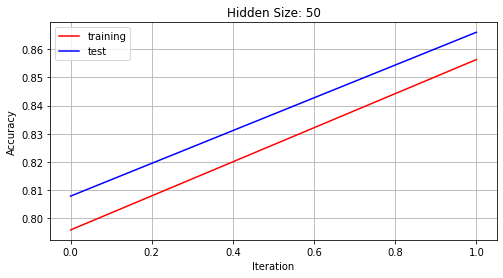

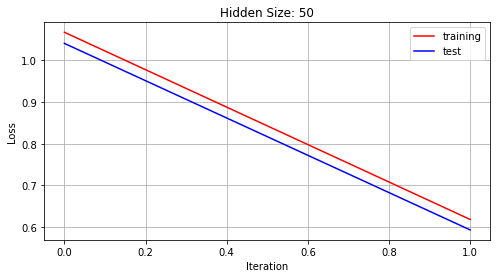

In [34]:
parameters_list = [50,250,784,2000,5000,10000,50000,200000]


for para_index, parameter in enumerate(parameters_list):
    test_accuracy_list = []
    training_accuracy_list = []
    test_loss_list = []
    training_loss_list = []
    model = BaselineModel(784,parameter,10)
    SGD_optimiser = torch.optim.SGD(params=model.parameters(),lr=0.01)
    loss_function = torch.nn.CrossEntropyLoss()
    epochs = 2


    for epoch in range(epochs):
        #training 
        for batch in train_loader:
            data,labels = batch
            SGD_optimiser.zero_grad()
            output = model.forward(data)
            loss = loss_function(output,labels)
            loss.backward()
            SGD_optimiser.step()
        
        # the reason i computed the training loss again is that in the training process done before, we had losses of 
        # different data summed together in different stages(parameters) of training, so the loss of that specific data is related
        # to that specific stage(weight parameter). But after each one epoch, we evaluated test set based on the parameters
        # of the last updated version of that epoch. so i think it would be better to compare training set performance with 
        #test set performance if we have the same metric.
        training_loss = 0
        class_correct = 0
        class_total = 0
        for batch in train_loader:
            data,labels = batch
            output = model.forward(data)
            loss = loss_function(output,labels)
            training_loss += loss.item()
            for i,output_data in enumerate(output):
                index = torch.argmax(output_data)
                if index == labels[i]:
                    class_correct +=1
                class_total += 1
        training_accuracy_list.append(class_correct/class_total)
        training_loss_list.append(training_loss/len(train_loader))
        print("epoch: {}, training_loss(batch avg):{} ,training_accuracy: {} ".format(epoch, training_loss/len(train_loader),class_correct/class_total))  


            #testing 
        test_loss = 0
        class_correct = 0
        class_total = 0
        for batch in test_loader:
            data,labels = batch
            output = model.forward(data)
            loss = loss_function(output,labels)
            test_loss += loss.item()
            for i,output_data in enumerate(output):
                index = torch.argmax(output_data)
                if index == labels[i]:
                    class_correct +=1
                class_total += 1
        test_accuracy_list.append(class_correct/class_total)
        test_loss_list.append(test_loss/len(test_loader))
        print("epoch: {}, test_loss(batch avg):{} ,test_accuracy: {} ".format(epoch, test_loss/len(test_loader),class_correct/class_total))

    fig, ax = plt.subplots(figsize = (8,4))
    ax.plot(training_accuracy_list, color = "red",label="training")
    ax.plot(test_accuracy_list, color = "blue",label="test")
    ax.grid(True)
    plt.ylabel("Accuracy")
    plt.xlabel("Iteration")
    plt.title("Hidden Size: {}".format(parameter))
    ax.legend()
    plt.savefig("Accuracy_{}.png".format(parameter))
    
    fig, ax = plt.subplots(figsize = (8,4))
    ax.plot(training_loss_list, color = "red",label="training")
    ax.plot(test_loss_list, color = "blue",label="test")
    ax.grid(True)
    plt.ylabel("Loss")
    plt.xlabel("Iteration")
    plt.title("Hidden Size: {}".format(parameter))
    ax.legend()
    plt.savefig("Loss_{}.png".format(parameter))
    


Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: .
    Transforms (if any): Compose(
                             ToTensor()
                             Lambda()
                         )
    Target Transforms (if any): None